In [1]:
# Paketai
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("Stars.csv")
df['Color'].unique()
df['color_pure'] = np.int8(df['Color'].isin(['Red', 'White', 'Blue', 'Orange' 'white']))
for c in df['Spectral_Class'].unique():
    df['sp_class_' + c] = np.int8(df['Spectral_Class']==c)

# 1

In [3]:
from sklearn.model_selection import cross_validate
# reikia tik kiekybinių požymių
X,y = df[['Temperature', 'L', 'R', 'A_M']].values, np.int8( df['Type']==2)

In [4]:
# a
rfa = RandomForestClassifier(random_state=0)
cross_validate(rfa, X, y, cv = 5)['test_score'].mean()

1.0

In [5]:
# b
grid = {
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': [1,2,3,],
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=grid, 
    cv=3)
rfb = grid_search.fit(X,y)
rfb.best_score_


1.0

In [6]:
# c
rfc = RandomForestClassifier(random_state=0, 
                             criterion = 'entropy')
cross_validate(rfc, X, y, cv = 5)['test_score'].mean()

1.0

# 2

In [7]:
from sklearn.model_selection import validation_curve
X,y = df[['Temperature', 'L', 'R', 'A_M', 'sp_class_M','color_pure', 
          'sp_class_B', 'sp_class_A','sp_class_F', 'sp_class_O',
          'sp_class_K']].values, np.int8(df['Type']==2)
prange = [10*i for i in range(1, 50+1)]

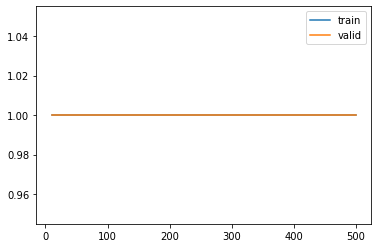

In [8]:
train_scores, valid_scores = validation_curve(
RandomForestClassifier(random_state=0),
X,
y,
param_name="n_estimators",
param_range= prange)
plt.plot(prange, train_scores.mean(axis = 1), label = 'train')
plt.plot(prange, valid_scores.mean(axis = 1), label = 'valid')
plt.legend()

In [9]:
# b
# su visais n_estimators klasifikuoja tobulai

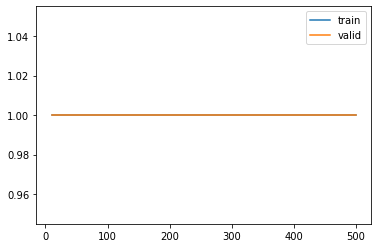

In [10]:
# c
train_scores, valid_scores = validation_curve(
RandomForestClassifier(random_state=0),
X,
y,
param_name="n_estimators",
param_range= prange,
scoring='roc_auc')
plt.plot(prange, train_scores.mean(axis = 1), label = 'train')
plt.plot(prange, valid_scores.mean(axis = 1), label = 'valid')
plt.legend()

In [11]:
# Su visais n_estimators tobulai klasifikuoja

# 3 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X,y = df[['Temperature', 'L', 'R', 'A_M', 'sp_class_M','color_pure', 
          'sp_class_B', 'sp_class_A','sp_class_F', 'sp_class_O',
          'sp_class_K']].values, np.int8(df['Type']==2)

In [13]:
# n_estimators renkuos 30
# parametrus renkuosi nutyletus (default)
rf = RandomForestClassifier(n_estimators=30, random_state=0)

In [14]:
# a
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, random_state=0)
rf = RandomForestClassifier(n_estimators=30, random_state=0)
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print("F1: ", metrics.f1_score(ytest, pred))
fpr, tpr, thresholds = metrics.roc_curve(ytest, pred)
print("AUC: ", metrics.auc(fpr, tpr))


F1:  1.0
AUC:  1.0


In [15]:
# b
rf = RandomForestClassifier(n_estimators=30, random_state=0, oob_score=True)
rf.fit(X, y)
pred = np.argmax(rf.oob_decision_function_,axis=1)
print("F1: ", metrics.f1_score(y, pred))
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
print("AUC: ", metrics.auc(fpr, tpr))


F1:  1.0
AUC:  1.0


# 4

In [16]:
from sklearn import tree
X,y = df[['Temperature', 'L', 'R', 'A_M']].values, np.int8( df['Type']==2)

In [17]:
# a
treea = tree.DecisionTreeClassifier(random_state=0,
                                    max_depth=4)
treea.fit(X, y)
# b
treeb = tree.DecisionTreeClassifier(random_state=0,
                                    min_impurity_decrease=0.01)
treeb.fit(X, y)
# c
treec = tree.DecisionTreeClassifier(random_state=0,
                                    max_leaf_nodes=5)
treec.fit(X, y)


DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [18]:
print("Mazgu skaicius treea", treea.tree_.node_count)
print("Mazgu skaicius treeb", treeb.tree_.node_count)
print("Mazgu skaicius treec", treec.tree_.node_count)
# Visi vienodi, imu treea

Mazgu skaicius treea 3
Mazgu skaicius treeb 3
Mazgu skaicius treec 3


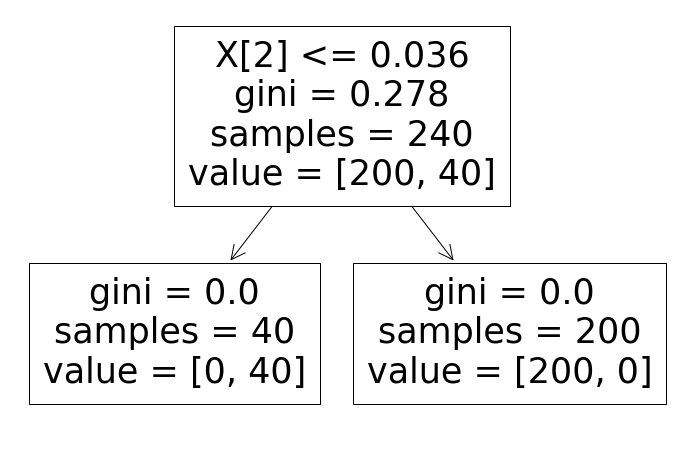

In [19]:
fig_width, fig_height = 12, 8
plt.rcParams['figure.figsize'] = [fig_width, fig_height]
tree.plot_tree(treea)
plt.show()

In [20]:

pd.DataFrame({
    'feature':['Temperature', 'L', 'R', 'A_M'],
    'importance':treea.feature_importances_}
             )

,feature,importance
0,Temperature,0.0
1,L,0.0
2,R,1.0
3,A_M,0.0


In [21]:
# Svarbiausias pozymis - R - Relative radius